# Example – diagnosing breast cancer with the k-NN algorithm

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Step 1 – collecting data

In [3]:
#We will utilize the Wisconsin Breast Cancer Diagnostic dataset from the UCI Machine Learning Repository
#The breast cancer data includes 569 examples of cancer biopsies, each with 32 features.
#There are 30 numeric measurements comprise the mean, standard error, and worst values
df = pd.read_csv('10 wisc_bc_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Step 2 – exploring and preparing the data

In [4]:
df.drop('id',axis=1,inplace=True)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


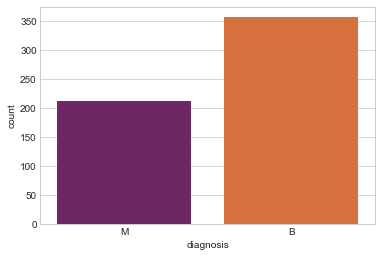

In [6]:
#diagnosis, is of particular interest as it is the outcome we hope to predict. 
#This feature indicates whether the example is from a benign or malignant mass.
sns.countplot(x='diagnosis',data=df,palette='inferno')

In [10]:
#Transformation – normalizing numeric data
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis',axis=1))
scaled_features = scaler.transform(df.drop('diagnosis',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:])
df_feat.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [11]:
#Data preparation – creating training and test datasets
y_train = df[:469]['diagnosis']
x_train = df_feat[:469]
y_test  = df[469:]['diagnosis']
x_test  = df_feat[469:]

# Step 3 – training a model on the data

In [14]:
#As our training data includes 469 instances, we might try k = 21, an odd number roughly equal to the square root of 469. 
#With a two-category outcome, using an odd number eliminates the chance of ending with a tie vote.
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

# Step 4 – evaluating model performance

In [16]:
#The cell percentages in the table indicate the proportion of values that fall into four categories. 
#The top-left cell indicates the true negative results. 
#These 77 of 100 values are cases where the mass was benign and the k-NN algorithm correctly identifed it as such. 
#The bottom-right cell indicates the true positive results.
#A total of 21 of 100 predictions were true positives.
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[77  0]
 [ 2 21]]


# Step 5 – improving model performance

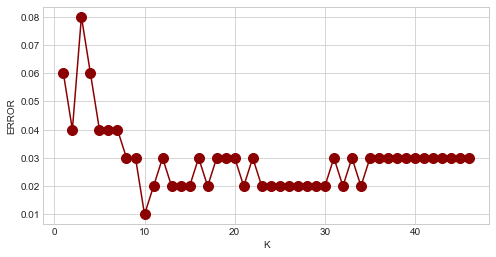

In [29]:
#Elbow method
x_val = []
y_val = []

for i in range(1,47):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    x_val.append(i)
    y_val.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,4))
plt.plot(x_val,y_val,color='darkred',marker='o',markersize=10)
plt.xlabel('K')
plt.ylabel('ERROR')

In [30]:
#with k =10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[77  0]
 [ 1 22]]
